In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [3]:
df = pd.read_csv('BBRI.csv')
df.head()

,Date,Open,High,Low,Close,Change,Change(%),Ratio(%),Volume,Value(T)
0,2014-01-02,1460,1470,1440,1460,Rise,10,1,1226275,178742550
1,2014-01-03,1450,1460,1430,1450,Fall,10,1,1026825,148682950
2,2014-01-06,1440,1450,1400,1405,Fall,45,3,1119605,159002557
3,2014-01-07,1415,1425,1415,1415,Rise,10,1,889715,126280787
4,2014-01-08,1420,1445,1420,1435,Rise,20,1,962545,137680637


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2470 non-null   object
 1   Open       2470 non-null   int64 
 2   High       2470 non-null   int64 
 3   Low        2470 non-null   int64 
 4   Close      2470 non-null   int64 
 5   Change     2470 non-null   object
 6   Change(%)  2470 non-null   int64 
 7   Ratio(%)   2470 non-null   int64 
 8   Volume     2470 non-null   int64 
 9   Value(T)   2470 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 193.1+ KB


In [314]:
df.Close.describe()

count    2470.000000
mean     3465.651822
std      1103.923386
min      1405.000000
25%      2370.000000
50%      3450.000000
75%      4330.000000
max      6300.000000
Name: Close, dtype: float64

In [5]:
import pandas as pd

# Misalkan kolom indeks DataFrame Anda bernama 'Date'
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2470 non-null   datetime64[ns]
 1   Open       2470 non-null   int64         
 2   High       2470 non-null   int64         
 3   Low        2470 non-null   int64         
 4   Close      2470 non-null   int64         
 5   Change     2470 non-null   object        
 6   Change(%)  2470 non-null   int64         
 7   Ratio(%)   2470 non-null   int64         
 8   Volume     2470 non-null   int64         
 9   Value(T)   2470 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 193.1+ KB


In [7]:
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Change,Change(%),Ratio(%),Volume,Value(T)
Date,,,,,,,,,
2014-01-02,1460,1470,1440,1460,Rise,10,1,1226275,178742550
2014-01-03,1450,1460,1430,1450,Fall,10,1,1026825,148682950
2014-01-06,1440,1450,1400,1405,Fall,45,3,1119605,159002557
2014-01-07,1415,1425,1415,1415,Rise,10,1,889715,126280787
2014-01-08,1420,1445,1420,1435,Rise,20,1,962545,137680637


In [170]:
df.Close.describe()

count    2470.000000
mean     3465.651822
std      1103.923386
min      1405.000000
25%      2370.000000
50%      3450.000000
75%      4330.000000
max      6300.000000
Name: Close, dtype: float64

Statistik deskriptif tersebut merupakan ringkasan statistik dari data Close pada saham. Berikut adalah penjelasan untuk setiap metrik:

1. Count (Jumlah Data): Jumlah total data yang tersedia, yaitu 2470.
2. Mean (Rata-rata): Rata-rata dari seluruh data Close adalah sekitar 3465.65.
3. Std (Standar Deviasi): Standar deviasi menunjukkan sebaran atau variasi data dari rata-rata. Nilainya adalah sekitar 1103.92, yang menunjukkan bahwa data memiliki variasi yang signifikan dari rata-rata.
4. Min (Nilai Minimum): Nilai terkecil dari seluruh data Close adalah 1405. Ini adalah titik terendah dalam rentang data.
5. 25% (Kuartil Pertama): Nilai di mana 25% data terkecil berada di bawahnya. Sebanyak 25% dari data Close memiliki nilai di bawah 2370.
6. 50% (Median atau Kuartil Kedua): Nilai tengah dari data, atau nilai di mana 50% data terletak di bawahnya. Median dari data Close adalah 3450.
7. 75% (Kuartil Ketiga): Nilai di mana 75% data terkecil berada di bawahnya. Sebanyak 75% dari data Close memiliki nilai di bawah 4330.
8. Max (Nilai Maksimum): Nilai terbesar dari seluruh data Close adalah 6300. Ini adalah titik tertinggi dalam rentang data.

Ringkasan statistik ini memberikan gambaran singkat tentang distribusi data Close pada saham, termasuk seberapa tersebar data tersebut dari rata-rata dan di mana titik-titik kunci seperti median dan kuartil berada dalam rentang data.

Text(0, 0.5, 'Price')

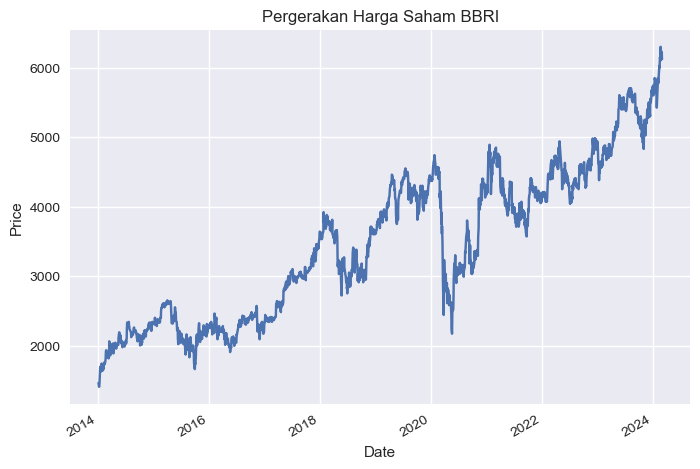

In [8]:
df['Close'].plot()
plt.title('Pergerakan Harga Saham BBRI')
plt.ylabel('Price')

In [9]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [10]:
test_result=adfuller(df.Close)

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adfuller_test(df.Close)

ADF Test Statistic : -0.9197099880711338
p-value : 0.781412361109808
#Lags Used : 4
Number of Observations Used : 2465
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Dengan kata lain, hasil pengujian menunjukkan bahwa time series tidak stasioner karena memiliki akar unit, atau dengan kata lain, memiliki tren atau pola yang berubah seiring waktu.

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

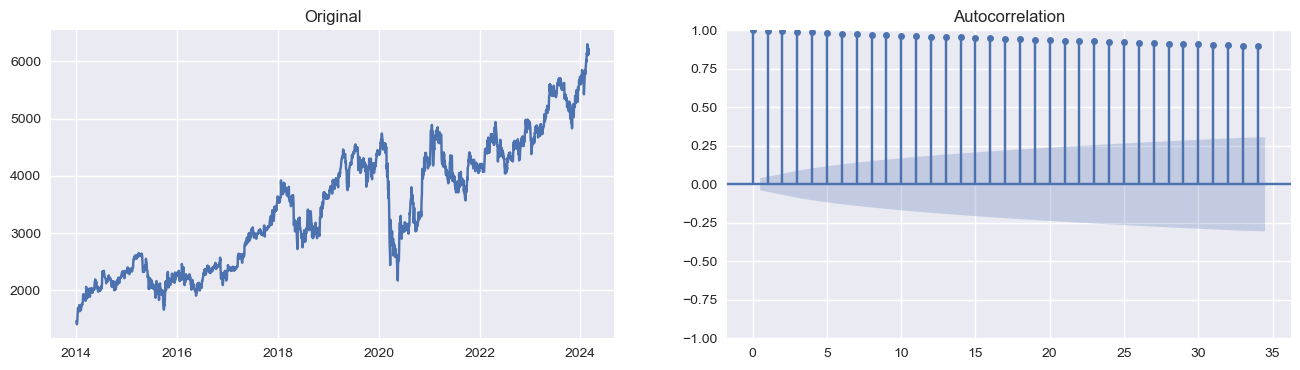

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title('Original')

#add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.Close, ax=ax2);

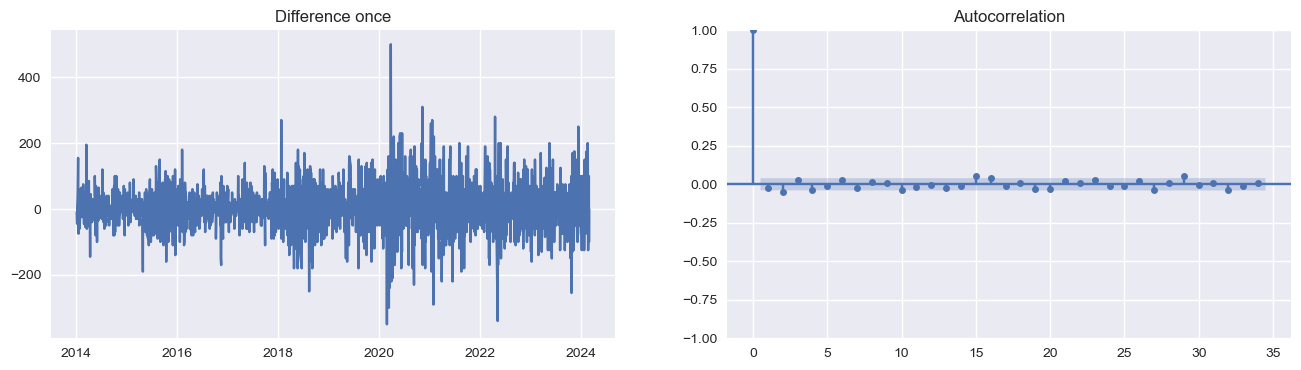

In [15]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')

#add ; at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);

#### plot hasil differencing sekali agar data stationer

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
diff = df.Close.diff().dropna()
adfuller_test(diff)

ADF Test Statistic : -26.174551677550546
p-value : 0.0
#Lags Used : 3
Number of Observations Used : 2465
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


#### Dalam konteks model ARIMA, nilai d akan diatur menjadi 1, karena differencing sekali sudah cukup untuk membuat data stasioner. Ini berarti kita akan menggunakan model ARIMA dengan nilai d = 1 untuk melakukan analisis dan prediksi lebih lanjut.

In [20]:
from pmdarima.arima.utils import ndiffs

In [21]:
ndiffs(df.Close, test='adf')

1

#### Library pmdarima menyediakan fungsi ndiffs yang dapat digunakan untuk menentukan jumlah differencing yang diperlukan agar data menjadi stasioner. Dalam hal ini, output fungsi ndiffs menunjukkan bahwa differencing sebanyak 1 sudah cukup untuk membuat data menjadi stasioner. 

In [171]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


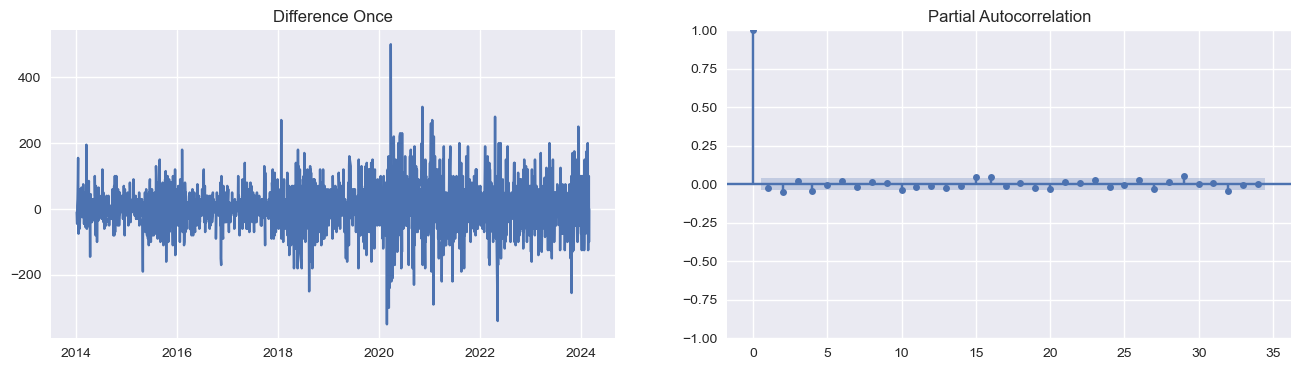

In [172]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

#### Berdasarkan hasil plot PACF (Partial Autocorrelation Function), kita melihat bahwa ada lag yang signifikan pada lag ke-2 dan lag ke-4. Ini berarti terdapat korelasi yang signifikan antara observasi saat ini dengan observasi dua periode sebelumnya (lag 2) dan empat periode sebelumnya (lag 4)

p = 2 atau p = 4

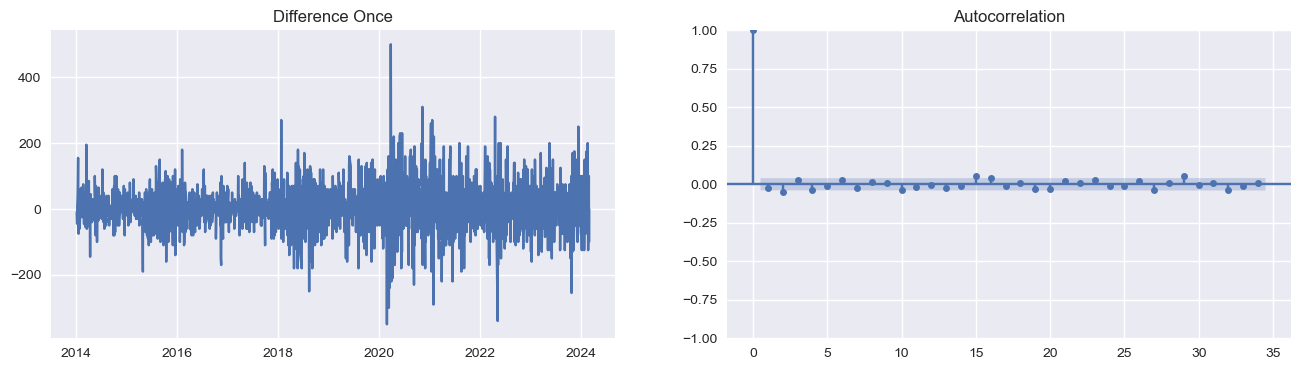

In [24]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

#### Berdasarkan hasil plot ACF (Autocorrelation Function), kita melihat bahwa ada lag yang signifikan sama pada lag ke-2 dan lag ke-4. Ini berarti terdapat korelasi yang signifikan antara observasi saat ini dengan observasi dua periode sebelumnya (lag 2) dan empat periode sebelumnya (lag 4).

q = 2 atau q = 4

## Train Test Split

In [173]:
len(df.Close)

2475

In [174]:
to_row = int(len(df)*0.9)

train = list(df[0:to_row]['Close'])
test = list(df[to_row:]['Close'])

In [175]:
len(train)

2227

In [339]:
len(test)

247

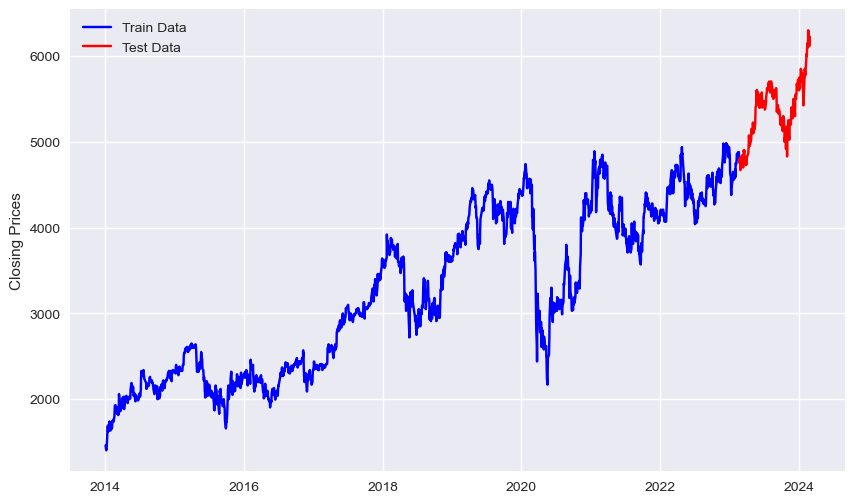

In [176]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Close'], 'blue', label='Train Data')
plt.plot(df[to_row:]['Close'], 'red', label='Test Data')
plt.legend()

plt.show()

## Model ARIMA Manual
1. (2,1,2)
2. (4,1,2)
3. (2,1,4)

kemudian dibandingkan dengan autoarima, yang menarik mana

# autoarima

In [177]:
import pmdarima as pm

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p=2,
                             start_q=0,
                             test='adf',
                             seasonal=True,
                             trace=True,
                             stepwise=False)
    return automodel

In [179]:
automodel = arimamodel(train)
print(automodel.summary)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=24939.709, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=24941.591, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=24935.840, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=24935.643, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=24936.130, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=24937.591, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=24941.602, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=24940.739, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=24935.391, Time=0.78 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=24937.108, Time=0.77 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=24937.927, Time=1.47 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=24936.232, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=24935.151, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=24932.967, Time=1.89 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=24934.032, Time=1.60

In [180]:
automodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2227
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -12460.484
Date:                Sat, 02 Mar 2024   AIC                          24932.967
Time:                        10:32:25   BIC                          24967.215
Sample:                             0   HQIC                         24945.474
                               - 2227                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8034      3.600      1.056      0.291      -3.253      10.859
ar.L1         -1.0020      0.138     -7.282      0.000      -1.272      -0.732
ar.L2         -0.6507      0.122     -5.336      0.000      -0.890      -0.412
ma.L1          1.0004      0.142      7.033      0.000       0.722       1.279
ma.L2          0.6020      0.128      4.689      0.000       0.350       0.854
sigma2      4242.0089     76.058     55.774      0.000    4092.939    4391.079
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1635.50
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.99   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### didapatkan model terbaik arima (2,1,2)

# ARIMA Manual

In [181]:
model_predictions = []
n_test_obser = len(test)

In [182]:
from statsmodels.tsa.arima.model import ARIMA

for i in range(n_test_obser):
    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]  # Mengambil nilai dari array numpy
    model_predictions.append(yhat)
    actual_test_value = test[i]
    train.append(actual_test_value)

In [183]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2474
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13847.400
Date:                Sat, 02 Mar 2024   AIC                          27704.799
Time:                        10:36:02   BIC                          27733.865
Sample:                             0   HQIC                         27715.357
                               - 2474                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9897      0.092    -10.712      0.000      -1.171      -0.809
ar.L2         -0.7751      0.089     -8.687      0.000      -0.950      -0.600
ma.L1          0.9711      0.098      9.894      0.0

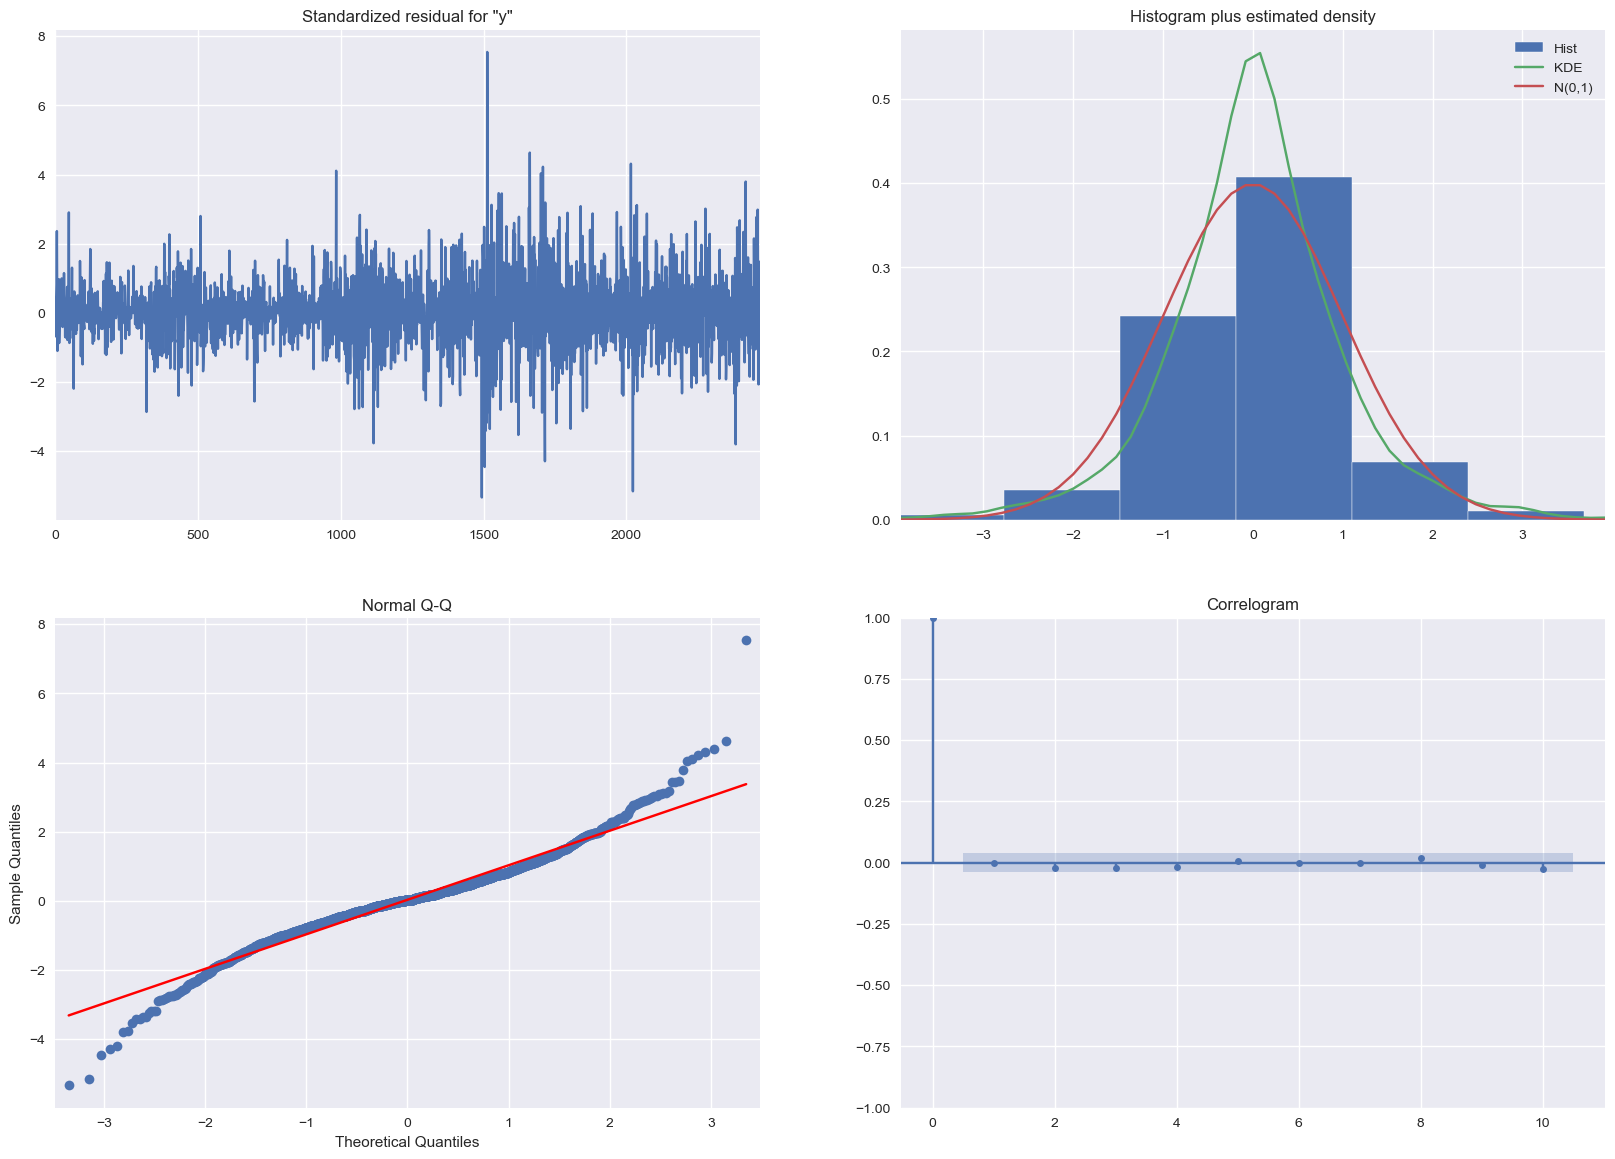

In [29]:
model_fit.plot_diagnostics(figsize=(20, 14))
plt.show()

Pada plot di atas, kita dapat mengamati beberapa hal sebagai berikut:

1. Residuals Uncorrelated: Plot di bagian kanan bawah menunjukkan bahwa residual (sisa) tidak memiliki korelasi antara satu sama lain. Ini menunjukkan bahwa model telah berhasil menangkap pola dalam data dan tidak ada pola residu yang tersisa.

2. Tidak Ada Musiman yang Jelas: Plot di bagian kiri atas menunjukkan bahwa tidak ada pola musiman yang jelas dalam residual. Ini menunjukkan bahwa model telah berhasil menangkap pola musiman dalam data, jika ada, dan tidak ada pola musiman yang tersisa dalam residual.

3. Residuals Distribusi Normal: Plot di bagian kanan atas menunjukkan bahwa distribusi residual memiliki rata-rata nol dan terdistribusi secara kasar secara normal. Ini menunjukkan bahwa model telah berhasil menangkap pola dalam data dengan baik dan tidak ada tren yang signifikan dalam residual.

4. QQ-Plot: Plot di bagian kiri bawah menunjukkan bahwa distribusi residual (titik biru) mengikuti garis tren linear dari sampel yang diambil dari distribusi normal standar dengan N(0, 1). Ini menunjukkan bahwa residual terdistribusi secara kasar dengan normal, yang merupakan indikasi bahwa model yang digunakan cocok dengan data dengan baik.

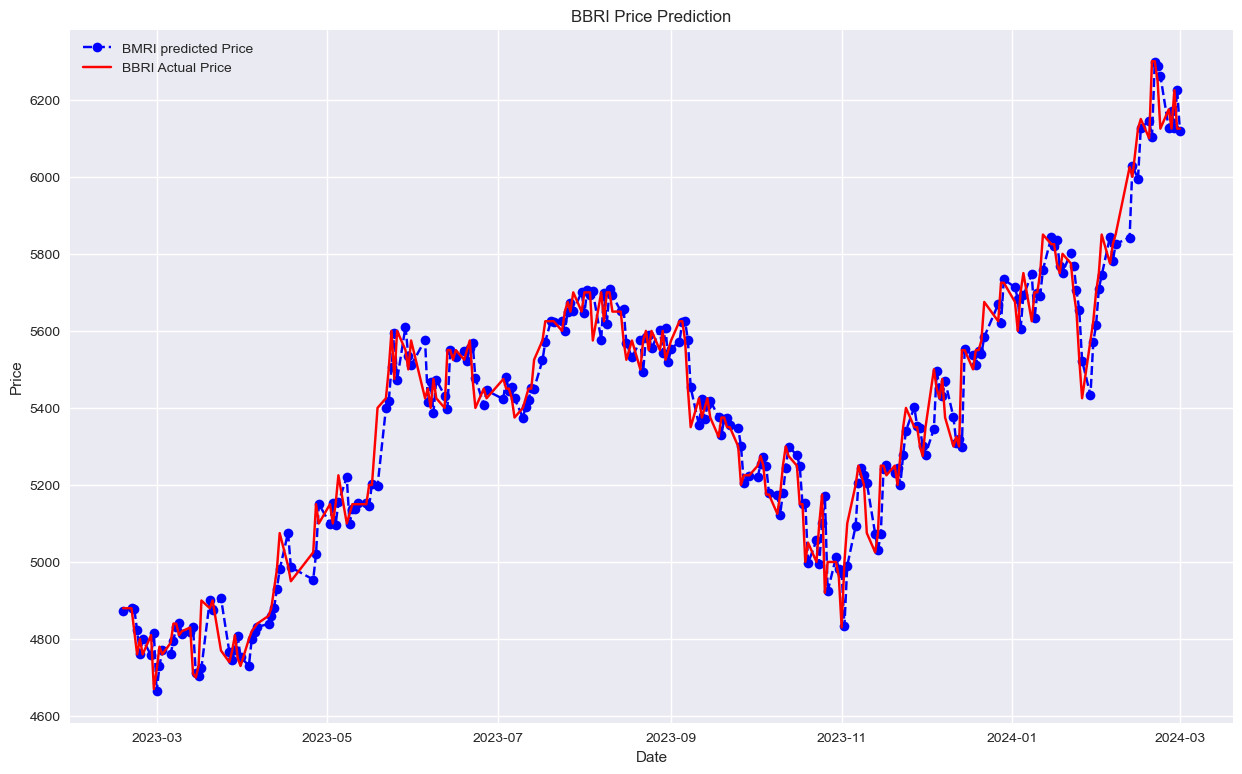

In [30]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color='blue', marker='o', ls='dashed', label='BMRI predicted Price')
plt.plot(date_range, test, color='red', label='BBRI Actual Price')

plt.title('BBRI Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [31]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Menghitung RMSE
rmse = sqrt(mean_squared_error(test, model_predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 71.844


In [32]:
# report performance
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test))/np.abs(test))
print('MAPE: '+str(mape))


MAPE: 0.010308489390426926


#### Nilai MAPE sebesar 0.0103 menunjukkan bahwa rata-rata persentase kesalahan absolut antara nilai aktual dan nilai yang diprediksi oleh model adalah sekitar 1.03%. Artinya, model memiliki tingkat kesalahan yang relatif rendah, yaitu sekitar 1.03% dari nilai aktual. Semakin rendah nilai MAPE, semakin baik kinerja model peramalan.

## Forcasting untuk masa depan dengan model yang sudah dibangun

In [81]:
df = pd.read_csv('BBRI.csv')

# Misalkan kolom indeks DataFrame Anda bernama 'Date'
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

df.tail(10)

,Open,High,Low,Close,Change,Change(%),Ratio(%),Volume,Value(T)
Date,,,,,,,,,
2024-02-19,6125,6175,6075,6100,Fall,50,1,1113829,682150510
2024-02-20,6175,6300,6175,6300,Rise,200,3,1608726,1004896275
2024-02-21,6325,6375,6225,6300,Unchnaged,0,0,1692931,1065289635
2024-02-22,6250,6300,6225,6250,Fall,50,1,1002560,626626155
2024-02-23,6125,6175,6050,6125,Fall,125,2,1486430,906804042
2024-02-26,6100,6200,6075,6175,Rise,50,1,1105090,677848200
2024-02-27,6125,6200,6125,6125,Fall,50,1,991875,611048222
2024-02-28,6100,6225,6100,6225,Rise,100,2,1187453,733797247
2024-02-29,6150,6200,6125,6125,Fall,100,2,1738458,1068598462


In [82]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat dan fitting model ARIMA
model2 = ARIMA(df['Close'], order=(2, 1, 2))
model_fit2 = model2.fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [83]:
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2470
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13847.400
Date:                Sat, 02 Mar 2024   AIC                          27704.799
Time:                        10:05:14   BIC                          27733.857
Sample:                             0   HQIC                         27715.355
                               - 2470                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9897      0.092    -10.712      0.000      -1.171      -0.809
ar.L2         -0.7751      0.089     -8.686      0.000      -0.950      -0.600
ma.L1          0.9711      0.098      9.893      0.000       0.779       1.164
ma.L2          0.7288      0.095      7.649      0.000       0.542       0.916
sigma2      4361.5441     74.784     58.322      0.000    4214.970    4508.119
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1511.62
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.08   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
from pandas.tseries.offsets import DateOffset

# Mengonversi indeks tanggal menjadi tipe Timestamp
df.index = pd.to_datetime(df.index)

# Membuat tanggal-tanggal di masa depan dengan tambahan satu hari
future_dates = []
for _ in range(5):
    future_date = df.index[-1] + DateOffset(days=1)
    future_dates.append(future_date)
    df.loc[future_date] = np.nan  # Menambahkan baris baru dengan nilai NaN

# Menampilkan tanggal-tanggal di masa depan
print(future_dates)

[Timestamp('2024-03-02 00:00:00'), Timestamp('2024-03-03 00:00:00'), Timestamp('2024-03-04 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-06 00:00:00')]


In [85]:
future_dates

[Timestamp('2024-03-02 00:00:00'),
 Timestamp('2024-03-03 00:00:00'),
 Timestamp('2024-03-04 00:00:00'),
 Timestamp('2024-03-05 00:00:00'),
 Timestamp('2024-03-06 00:00:00')]

In [86]:
future_dates_df = df.copy()
future_dates_df.tail(20)

,Open,High,Low,Close,Change,Change(%),Ratio(%),Volume,Value(T)
Date,,,,,,,,,
2024-02-07,5850.0,5900.0,5825.0,5850.0,Rise,25.0,0.0,1475715.0,8.647226e+08
2024-02-12,5875.0,6025.0,5850.0,6025.0,Rise,175.0,3.0,2008562.0,1.197955e+09
2024-02-13,6050.0,6050.0,5950.0,6000.0,Fall,25.0,0.0,1458522.0,8.756417e+08
2024-02-15,6275.0,6275.0,6100.0,6125.0,Rise,125.0,2.0,3086851.0,1.904077e+09
2024-02-16,6150.0,6200.0,6125.0,6150.0,Rise,25.0,0.0,1308144.0,8.049218e+08
2024-02-19,6125.0,6175.0,6075.0,6100.0,Fall,50.0,1.0,1113829.0,6.821505e+08
2024-02-20,6175.0,6300.0,6175.0,6300.0,Rise,200.0,3.0,1608726.0,1.004896e+09
2024-02-21,6325.0,6375.0,6225.0,6300.0,Unchnaged,0.0,0.0,1692931.0,1.065290e+09
2024-02-22,6250.0,6300.0,6225.0,6250.0,Fall,50.0,1.0,1002560.0,6.266262e+08


In [296]:
#future_dates_df = df.copy()
#future_dates_df.to_csv('forcast bbri.csv')

In [185]:
future = pd.read_csv('forcast bbri.csv')
future.tail(20)

,Date,Close
2455,2024-02-07,5850.0
2456,2024-02-12,6025.0
2457,2024-02-13,6000.0
2458,2024-02-15,6125.0
2459,2024-02-16,6150.0
2460,2024-02-19,6100.0
2461,2024-02-20,6300.0
2462,2024-02-21,6300.0
2463,2024-02-22,6250.0
2464,2024-02-23,6125.0


In [113]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2475 non-null   object 
 1   Close   2470 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.8+ KB


In [138]:
future['forecast'] = model_fit2.predict(start=2469, end=2479, dynamic=True)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [186]:
# Menggunakan metode get_forecast() untuk memprediksi output, lower, dan upper bound dengan level kepercayaan 80%
forecast_results = model_fit2.get_forecast(steps=5, alpha=0.1)  # Menggunakan level kepercayaan 90%

# Mengisi hasil prediksi ke dalam DataFrame future
future['forecast'] = forecast_results.predicted_mean
future['lower_bound'] = forecast_results.conf_int(alpha=0.1)['lower Close']
future['upper_bound'] = forecast_results.conf_int(alpha=0.1)['upper Close']

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [187]:
future.tail(15)

,Date,Close,forecast,lower_bound,upper_bound
2460,2024-02-19,6100.0,NaN,NaN,NaN
2461,2024-02-20,6300.0,NaN,NaN,NaN
2462,2024-02-21,6300.0,NaN,NaN,NaN
2463,2024-02-22,6250.0,NaN,NaN,NaN
2464,2024-02-23,6125.0,NaN,NaN,NaN
2465,2024-02-26,6175.0,NaN,NaN,NaN
2466,2024-02-27,6125.0,NaN,NaN,NaN
2467,2024-02-28,6225.0,NaN,NaN,NaN
2468,2024-02-29,6125.0,NaN,NaN,NaN
2469,2024-03-01,6125.0,NaN,NaN,NaN


In [149]:
# Misalkan kolom indeks DataFrame Anda bernama 'Date'
future['Date'] = pd.to_datetime(future['Date'])

In [150]:
future = future.set_index('Date')

In [133]:
future 

,Close,forecast,lower_bound,upper_bound
Date,,,,
2014-01-02,1460.0,NaN,NaN,NaN
2014-01-03,1450.0,NaN,NaN,NaN
2014-01-06,1405.0,NaN,NaN,NaN
2014-01-07,1415.0,NaN,NaN,NaN
2014-01-08,1435.0,NaN,NaN,NaN
...,...,...,...,...
2024-03-02,NaN,6134.312524,6025.683122,6242.941927
2024-03-03,NaN,6129.374280,5977.165675,6281.582884
2024-03-04,NaN,6127.043004,5942.934947,6311.151061


In [152]:
# Mengisi nilai close pada tanggal 2024-03-01 ke dalam kolom forecast, lower_bound, dan upper_bound
future.loc['2024-03-01', ['forecast', 'lower_bound', 'upper_bound']] = future.loc['2024-03-01', 'Close']

# Memastikan bahwa nilai close pada tanggal 2024-03-01 telah ditambahkan ke dalam tabel forecast, lower_bound, dan upper_bound
future.tail(10)

,Close,forecast,lower_bound,upper_bound
Date,,,,
2024-02-26,6175.0,NaN,NaN,NaN
2024-02-27,6125.0,NaN,NaN,NaN
2024-02-28,6225.0,NaN,NaN,NaN
2024-02-29,6125.0,NaN,NaN,NaN
2024-03-01,6125.0,6125.000000,6125.000000,6125.000000
2024-03-02,NaN,6134.312524,6025.683122,6242.941927
2024-03-03,NaN,6129.374280,5977.165675,6281.582884
2024-03-04,NaN,6127.043004,5942.934947,6311.151061
2024-03-05,NaN,6133.178003,5919.657033,6346.698973


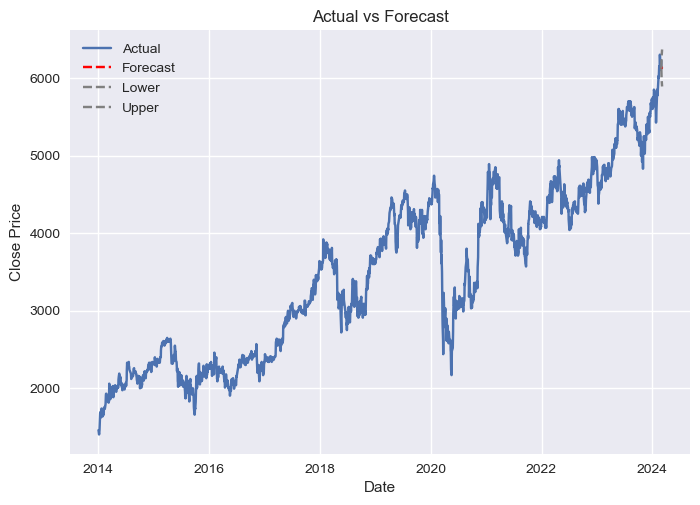

In [166]:
import matplotlib.pyplot as plt

# Plot data asli
plt.plot(future.index, future['Close'], label='Actual')

# Plot forecast
plt.plot(future.index, future['forecast'], label='Forecast', linestyle='--', color='red')

plt.plot(future.index, future['lower_bound'], label='Lower', linestyle='--', color='grey')
plt.plot(future.index, future['upper_bound'], label='Upper', linestyle='--', color='grey')

# Label dan judul plot
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast')
plt.legend()

# Tampilkan plot
plt.show()

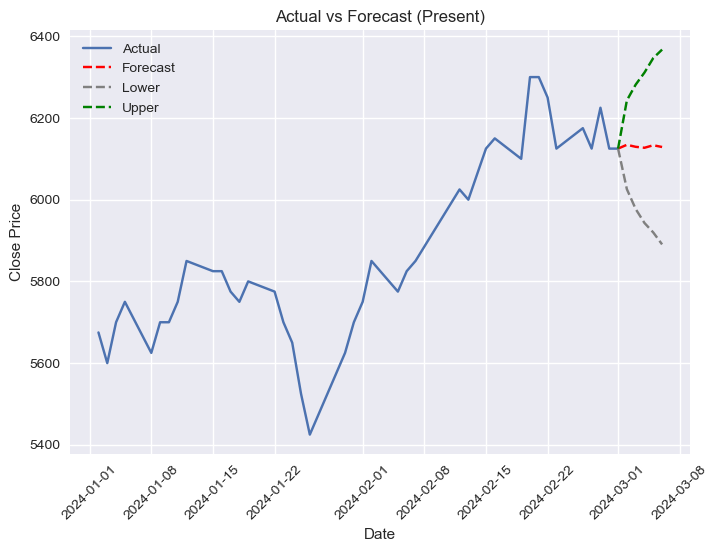

In [168]:
# Slicing rentang dari bulan Juni 2023 hingga data terakhir
future_df_sliced = future['2024':]

# Plot data asli
plt.plot(future_df_sliced.index, future_df_sliced['Close'], label='Actual')

# Plot forecast
plt.plot(future_df_sliced.index, future_df_sliced['forecast'], label='Forecast', linestyle='--', color='red')
plt.plot(future_df_sliced.index, future_df_sliced['lower_bound'], label='Lower', linestyle='--', color='grey')
plt.plot(future_df_sliced.index, future_df_sliced['upper_bound'], label='Upper', linestyle='--', color='green')

# Label dan judul plot
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast (Present)')
plt.legend()
# Membuat label sumbu x miring
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()


In [169]:
future.tail(5)

,Close,forecast,lower_bound,upper_bound
Date,,,,
2024-03-02,NaN,6134.312524,6025.683122,6242.941927
2024-03-03,NaN,6129.374280,5977.165675,6281.582884
2024-03-04,NaN,6127.043004,5942.934947,6311.151061
2024-03-05,NaN,6133.178003,5919.657033,6346.698973
2024-03-06,NaN,6128.913467,5890.537567,6367.289368


In [367]:
future_df_2024.to_csv('final.csv')